In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
DATA_FOLDER = "DATA/"
FILE_NAME = "PhonePricePrediction.csv"

file_path = DATA_FOLDER + FILE_NAME

In [3]:
phone_data = pd.read_csv(file_path)
phone_data.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
phone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
phone_data.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [6]:
phone_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Basic training

In [7]:
X = phone_data.iloc[:, :-1].values
y = phone_data.iloc[:, -1].values
y

array([1, 2, 2, ..., 3, 0, 3], dtype=int64)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
#import random

#random.randint(0, 1000)
## 215

In [10]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

def generate_result(model_name, model):
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred=prediction)
    precision = precision_score(y_test, y_pred=prediction, average = "macro")
    f1 = f1_score(y_test, y_pred=prediction, average = "macro")
    return [model_name, accuracy, precision, f1]

In [11]:
def generate_df(results):
    df = pd.DataFrame(results, columns=["name","accuracy", "precision", "f1"])
    df.set_index("name", inplace = True)
    return df

In [12]:
from sklearn.ensemble import RandomForestClassifier

RF_base = RandomForestClassifier(random_state = 215)
RF_result = generate_result("Simple Random Forest",RF_base)
RF_result

['Simple Random Forest', 0.855, 0.8500110537951364, 0.850575886471355]

## Testing impact of number of trees

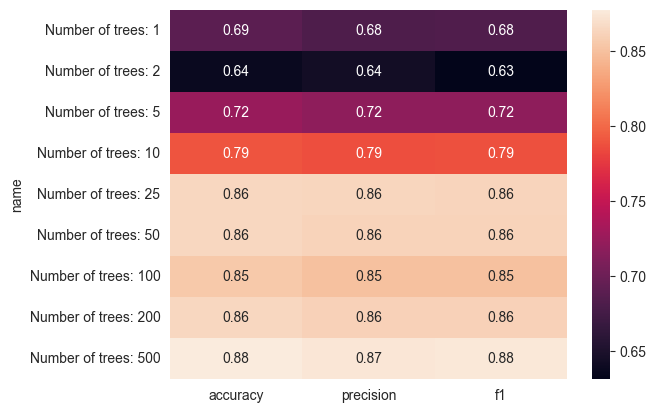

In [13]:
number_of_trees = [1, 2, 5, 10, 25, 50, 100, 200, 500]
results_num_of_trees = []

def test_RF(RF_classifier, result_array, name, param):
    name = name + str(param)
    RF_results = generate_result(name,RF_classifier)
    result_array.append(RF_results)

for number in number_of_trees:
    RF = RandomForestClassifier(n_estimators = number, random_state = 215)
    test_RF(RF, results_num_of_trees, "Number of trees: ", number)

sns.heatmap(generate_df(results_num_of_trees), annot = True)
plt.show()

## Testing impact of bootstrap

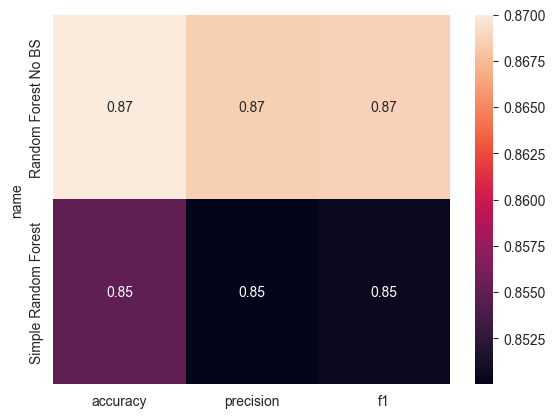

In [14]:
RF_no_bootstrap = RandomForestClassifier(bootstrap = False, random_state = 215)
RF_no_bs_result = generate_result("Random Forest No BS",RF_no_bootstrap)
sns.heatmap(generate_df([RF_no_bs_result, RF_result]), annot = True)
plt.show()

## Testing impact of number of features

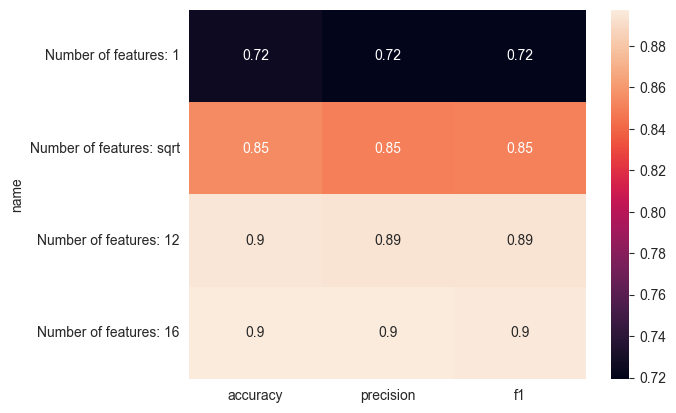

In [15]:
number_of_features = [1, "sqrt", 12, 16]
results_features = []


for number in number_of_features:
    RF = RandomForestClassifier(max_features = number, random_state = 215)
    test_RF(RF, results_features, "Number of features: ", number)
sns.heatmap(generate_df(results_features), annot = True)
plt.show()

## Testing impact of max depth

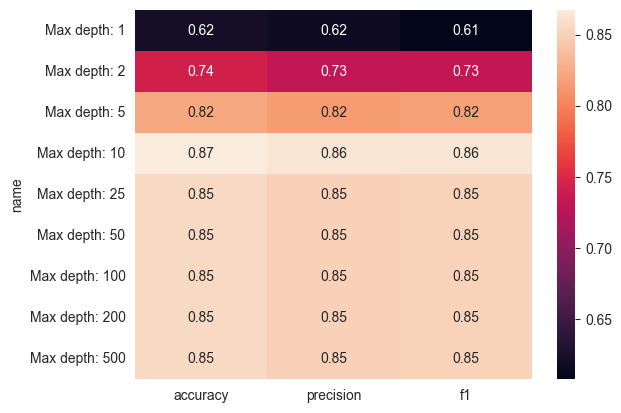

In [16]:
max_depth = [1, 2, 5, 10, 25, 50, 100, 200, 500]
results_depth = []


for number in number_of_trees:
    RF = RandomForestClassifier(max_depth = number, random_state = 215)
    test_RF(RF, results_depth, "Max depth: ", number)
sns.heatmap(generate_df(results_depth), annot = True)
plt.show()

# Comparing with another models

## Decision Tree Classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier
DT_base = DecisionTreeClassifier()
Dt_result = generate_result("Decision Tree",DT_base)
Dt_result

['Decision Tree', 0.83, 0.8298717299047842, 0.8295949507368793]

## Support Vector Machines(SVC)

In [18]:
from sklearn.svm import SVC
SVC_base = SVC()
SVC_result = generate_result("SVC",SVC_base)
SVC_result

['SVC', 0.955, 0.955356971780065, 0.9543090641648615]

## Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB
NB_base = GaussianNB()
NB_result = generate_result("Naive Bayes",NB_base)
NB_result

['Naive Bayes', 0.835, 0.8319091981526693, 0.8312659575537358]

## K-nearest neighbors

In [20]:
from sklearn.neighbors import KNeighborsClassifier
KNN_base = KNeighborsClassifier()
KNN_result = generate_result("K-nearest neighbors",KNN_base)
KNN_result

C:\Users\PC\PycharmProjects\RandomForestResearch\venv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\PC\PycharmProjects\RandomForestResearch\venv\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


['K-nearest neighbors', 0.9275, 0.9272435031084681, 0.9270416498037284]

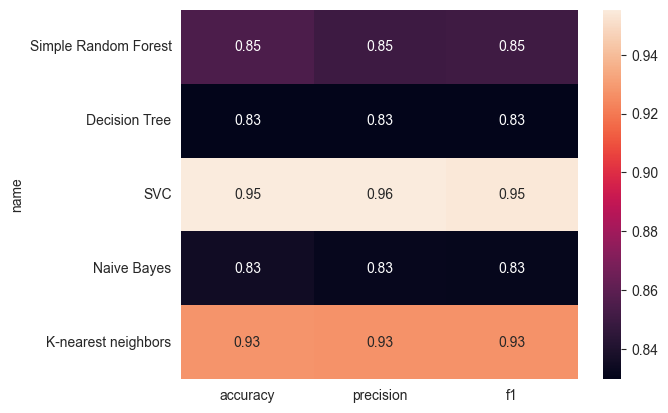

In [21]:
merged_models = [RF_result, Dt_result, SVC_result, NB_result, KNN_result]

sns.heatmap(generate_df(merged_models), annot = True)
plt.show()